In [1]:
# Details about the project 

In [2]:
# Importing the libraries needed for the project

# Pandas and numpy for writing to files, and for performing various statitical analysis on the data
import pandas as pd
import numpy as np

# The libraries below are used for visiualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The sklearn library  below is used for automatic splitting of the data, transforming the data for effecient model perfomance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# Sklearn is contains standard machine learning algorithms for complex data which are imported below
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [3]:
# Reading the train and test data

train = pd.read_csv(r'C:\Users\Hp\Documents\GitHub\Blood-Donation-Analysis\blood-train.csv')
test = pd.read_csv(r'C:\Users\Hp\Documents\GitHub\Blood-Donation-Analysis\blood-test.csv')

In [4]:
print('training data shape: ', train.shape) 
print('test data shape: ', test.shape)

training data shape:  (576, 6)
test data shape:  (200, 5)


In [5]:
# The first five rows of the train data shape

train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [6]:
# Number of people who donated in march 2007
train['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [7]:
# Storing dependent variable in Y

Y = train.iloc[:,-1]
Y.head()


0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [8]:
#last five rows of the training data 

train.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [9]:
# We remove some of the columns for to develop a well suited model

old_train = train
train = train.iloc[:,1:5]
test = test.iloc[:,1:5]

In [10]:
# Merging both train and test data

df = pd.merge(train, test)
print('merged data shape: ', df.shape)

merged data shape:  (810, 4)


In [11]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [12]:
# Setting the independent and dependent variable

X = df.iloc[:,:]
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [13]:
# Data exploration
# Thi shows the important statistics of the data that qould give more insight about the data

In [14]:
train

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
571,23,1,250,23
572,16,3,750,86
573,21,2,500,52
574,39,1,250,39


In [15]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


<AxesSubplot:ylabel='Months since Last Donation'>

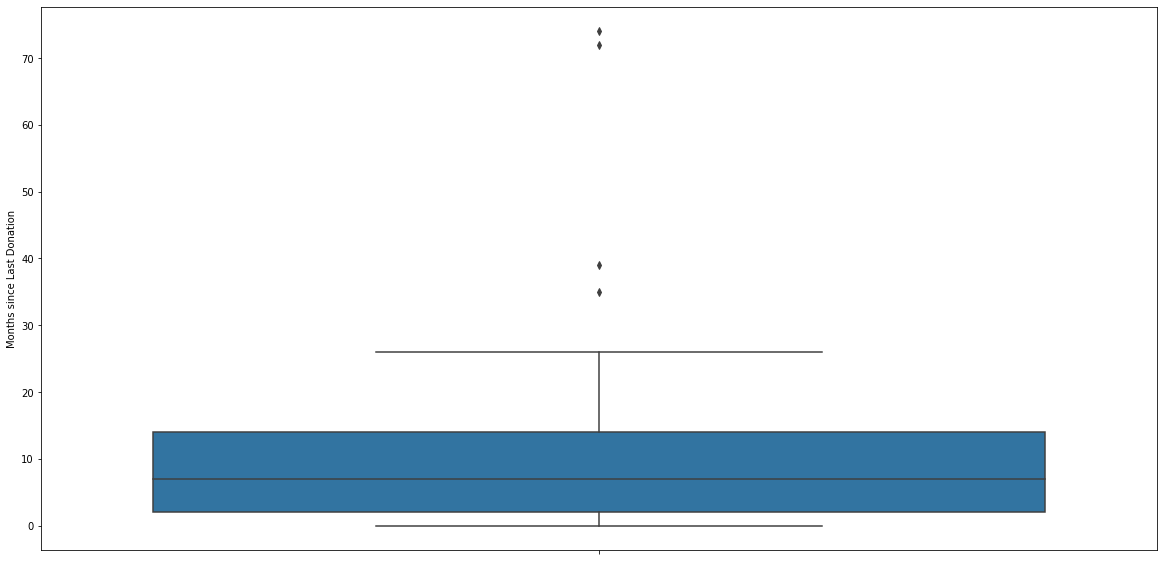

In [20]:
# Boxplot for Months since last donation
plt.figure(figsize=(20,10))
sns.boxplot(y="Months since Last Donation", data=old_train)

In [21]:
# In the box plot, the minimum number of people is zero
# We also see from the above plot that the maximum people that 
#donated blood in nearby 10 months

<AxesSubplot:>

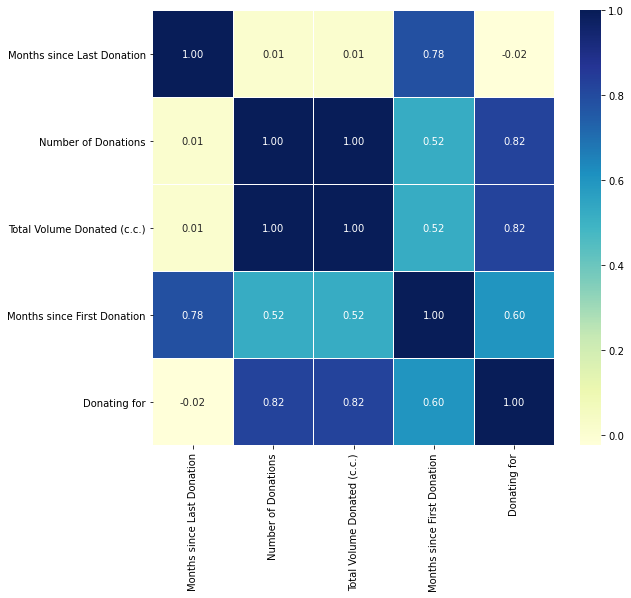

In [31]:
# Heeat map to check for correlation between all variables
corrmat = X.corr()
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat, ax = ax, cmap="YlGnBu", linewidths=0.1, fmt=".2f", annot=True)

In [27]:
# Printing all unque value for Month since last donation
train["Months since Last Donation"].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

In [29]:
# We create a new column or variable to calculate how many time a person have donated
X["Donating for"] = (X["Months since First Donation"] - X["Months since Last Donation"])

In [30]:
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


In [33]:
# Feature Transformation

In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# fitting and transforming data
X = scale.fit_transform(X)

In [37]:
train = X[:576]
test = X[576:]

Y = Y[:576]


In [38]:
# Model Building

In [39]:
# Splitting into traain and test set
xtrain, xtest, ytrain, ytest = train_test_split(train,Y, test_size=0.2,random_state=0)